In [3]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [4]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [5]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):

    prompt = f"Generate a joke about {state['topic']}"
    response = llm.invoke(prompt).content

    return {'joke':response}

In [7]:
def generate_explanation(state: JokeState):

    prompt = f"Explain the following joke: {state['joke']}"
    response = llm.invoke(prompt).content

    return {'explanation':response}

In [8]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

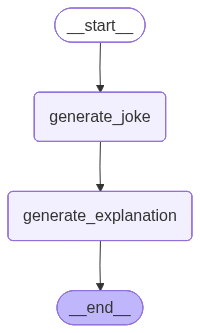

In [9]:
workflow

In [10]:
config = {"configurable":{'thread_id':"1"}}
workflow.invoke({'topic':'programming'},config=config)

{'topic': 'programming',
 'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!',
 'explanation': 'The joke plays on the double meaning of the words "light" and "bugs" in the context of programming:\n\n*   **Light:** Refers to the bright screen mode on computers, also known as "light mode."\n*   **Bugs:** Refers to errors or defects in computer code that cause programs to malfunction.\n\nThe punchline connects these two meanings: The joke suggests that programmers prefer dark mode because "light attracts bugs." This is a humorous way of saying that dark mode is preferable because it somehow helps avoid or hide errors in the code.'}

In [11]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!', 'explanation': 'The joke plays on the double meaning of the words "light" and "bugs" in the context of programming:\n\n*   **Light:** Refers to the bright screen mode on computers, also known as "light mode."\n*   **Bugs:** Refers to errors or defects in computer code that cause programs to malfunction.\n\nThe punchline connects these two meanings: The joke suggests that programmers prefer dark mode because "light attracts bugs." This is a humorous way of saying that dark mode is preferable because it somehow helps avoid or hide errors in the code.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3ce2-b8af-656f-8002-e80cb5c3b230'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-17T15:57:50.969175+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint

In [12]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!', 'explanation': 'The joke plays on the double meaning of the words "light" and "bugs" in the context of programming:\n\n*   **Light:** Refers to the bright screen mode on computers, also known as "light mode."\n*   **Bugs:** Refers to errors or defects in computer code that cause programs to malfunction.\n\nThe punchline connects these two meanings: The joke suggests that programmers prefer dark mode because "light attracts bugs." This is a humorous way of saying that dark mode is preferable because it somehow helps avoid or hide errors in the code.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3ce2-b8af-656f-8002-e80cb5c3b230'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-17T15:57:50.969175+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoin

## Time Travel

In [18]:
workflow.get_state({"configurable":{'thread_id':"1","checkpoint_id":"1f0c3ce2-99d6-64e9-8000-82196f4577b2"}})

StateSnapshot(values={'topic': 'programming'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c3ce2-99d6-64e9-8000-82196f4577b2'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-17T15:57:47.734551+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3ce2-99d3-6d89-bfff-73cd9e3c1c22'}}, tasks=(PregelTask(id='3f14fa84-4f42-9350-ad0c-f6694154cf1a', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!'}),), interrupts=())

In [19]:
workflow.invoke(None,{"configurable":{'thread_id':"1","checkpoint_id":"1f0c3ce2-99d6-64e9-8000-82196f4577b2"}})

{'topic': 'programming',
 'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!',
 'explanation': 'The joke plays on two meanings of the word "bug":\n\n*   **Literal Bug:** Insects are often attracted to light sources.\n*   **Programming Bug:** An error or defect in computer code.\n\nProgrammers use "dark mode" (a display setting with a dark background and light text) for various reasons, including reducing eye strain and saving battery life on some devices. The joke suggests they prefer it because the "light" of a bright screen would attract *programming bugs*, implying that dark mode helps them avoid errors in their code. It\'s a humorous connection between the everyday meaning of "bug" and its technical meaning in the programming world.'}

In [20]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'programming', 'joke': 'Why do programmers prefer dark mode?\n\nBecause light attracts bugs!', 'explanation': 'The joke plays on two meanings of the word "bug":\n\n*   **Literal Bug:** Insects are often attracted to light sources.\n*   **Programming Bug:** An error or defect in computer code.\n\nProgrammers use "dark mode" (a display setting with a dark background and light text) for various reasons, including reducing eye strain and saving battery life on some devices. The joke suggests they prefer it because the "light" of a bright screen would attract *programming bugs*, implying that dark mode helps them avoid errors in their code. It\'s a humorous connection between the everyday meaning of "bug" and its technical meaning in the programming world.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3ceb-f643-6d66-8002-57cd29aade95'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025